<a href="https://colab.research.google.com/github/varrshh/Next-Word-Prediction-ML/blob/main/next_word_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving prideandprejudice.txt to prideandprejudice.txt


In [ ]:
file = open("prideandprejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Pride and prejudice, by Jane Austen This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using th'

In [ ]:
len(data)

733811

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 182, 164, 1001, 3, 299, 4, 946, 30, 72, 710, 41, 1001, 23, 21]

In [ ]:
len(sequence_data)

131231

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7248


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  131228


array([[   1,  182,  164, 1001],
       [ 182,  164, 1001,    3],
       [ 164, 1001,    3,  299],
       [1001,    3,  299,    4],
       [   3,  299,    4,  946],
       [ 299,    4,  946,   30],
       [   4,  946,   30,   72],
       [ 946,   30,   72,  710],
       [  30,   72,  710,   41],
       [  72,  710,   41, 1001]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  182  164]
 [ 182  164 1001]
 [ 164 1001    3]
 [1001    3  299]
 [   3  299    4]
 [ 299    4  946]
 [   4  946   30]
 [ 946   30   72]
 [  30   72  710]
 [  72  710   41]]
Response:  [1001    3  299    4  946   30   72  710   41 1001]


In [ ]:
#converts class vector to binary class matrix
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             72480     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7248)              7255248   
                                                                 
Total params: 20,376,728
Trainable params: 20,376,728
Non-trainable params: 0
_________________________________________________________________


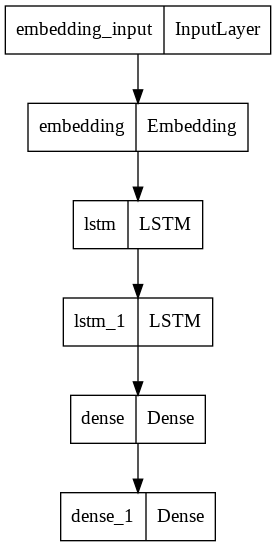

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=5, batch_size=64, callbacks=[checkpoint])

Epoch 1/5
2051/2051 [==============================] - ETA: 0s - loss: 6.0007
Epoch 1: loss improved from inf to 6.00070, saving model to next_words.h5
2051/2051 [==============================] - 1122s 545ms/step - loss: 6.0007
Epoch 2/5
2051/2051 [==============================] - ETA: 0s - loss: 5.4823
Epoch 2: loss improved from 6.00070 to 5.48235, saving model to next_words.h5
2051/2051 [==============================] - 1116s 544ms/step - loss: 5.4823
Epoch 3/5
2051/2051 [==============================] - ETA: 0s - loss: 5.1997
Epoch 3: loss improved from 5.48235 to 5.19966, saving model to next_words.h5
2051/2051 [==============================] - 1100s 536ms/step - loss: 5.1997
Epoch 4/5
 492/2051 [======>.......................] - ETA: 13:47 - loss: 5.0040

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: you are so
['you', 'are', 'so']
1/1 [==============================] - 0s 38ms/step
much
Enter your line: you are so much
['are', 'so', 'much']
1/1 [==============================] - 0s 44ms/step
as
Enter your line: you are so much as
['so', 'much', 'as']
1/1 [==============================] - 0s 40ms/step
to
Enter your line: you are so much as to
['much', 'as', 'to']
1/1 [==============================] - 0s 40ms/step
be
Enter your line: you are so much as to be
['as', 'to', 'be']
1/1 [==============================] - 0s 44ms/step
in
Enter your line: you are so much as to be in
['to', 'be', 'in']
1/1 [==============================] - 0s 42ms/step
the
Enter your line: you are so much as to be in the
['be', 'in', 'the']
1/1 [==============================] - 0s 35ms/step
world
Enter your line: 0
Execution completed.....
